In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier


In [2]:
# Load the dataset

data = pd.read_csv("Titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# DATA ANALYSIS
data.shape

(891, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data.duplicated().unique()

array([False])

In [9]:
# "Pclass" REPRESENTS TICKET CLASS OF THE PASSENGERS.

data["Pclass"].unique()


array([3, 1, 2])

In [10]:
# "Embarked" REPRESENTS ABBREVIATIONS FOR STATIONS.

data["Embarked"].unique()


array(['S', 'C', 'Q', nan], dtype=object)

C:\Users\user\AppData\Local\Temp\ipykernel_9416\980617679.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar1 = sns.barplot(x=data1["Survived"], y=data1["Count"], palette=["r", "g"])


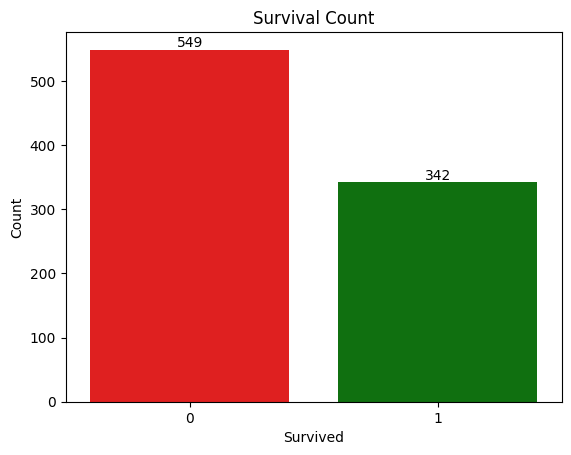

In [13]:
# COUNT OF SURVIVORS WAS LESS THAN THE PEOPLE WHO LOST THEIR LIVES


data1 = data["Survived"].value_counts().reset_index()
data1.columns = ["Survived", "Count"]
bar1 = sns.barplot(x=data1["Survived"], y=data1["Count"], palette=["r", "g"])
bar1.bar_label(bar1.containers[0])
bar1.bar_label(bar1.containers[1])
plt.title("Survival Count")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_9416\2501584559.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar2 = sns.barplot(x=data2["Pclass"], y=data2["Count"], palette=["r", "g", "y"])


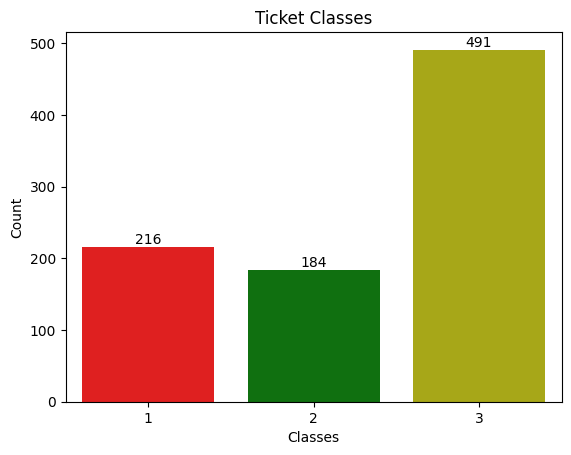

In [14]:
# PEOPLE TRAVELLED MORE IN 3RD CLASS.

data2 = data["Pclass"].value_counts().reset_index()
data2.columns = ["Pclass", "Count"]
bar2 = sns.barplot(x=data2["Pclass"], y=data2["Count"], palette=["r", "g", "y"])
bar2.bar_label(bar2.containers[0])
bar2.bar_label(bar2.containers[1])
bar2.bar_label(bar2.containers[2])
plt.title("Ticket Classes")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()


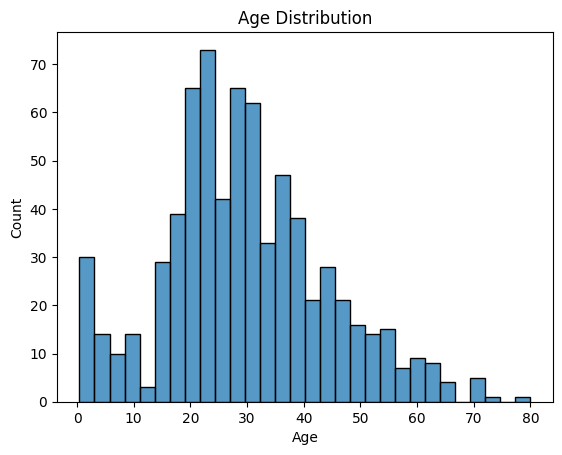

In [15]:
# THIS SHOWS MAXIMUM NUMBER OF PEOPLE TRAVELLED BETWEEN AGE 20-40 YEARS

sns.histplot(x=data["Age"], bins=30)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_9416\1216605379.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar3 = sns.barplot(x=data3["Sex"], y=data3["Count"], palette=["r", "g", "y"])
C:\Users\user\AppData\Local\Temp\ipykernel_9416\1216605379.py:5: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  bar3 = sns.barplot(x=data3["Sex"], y=data3["Count"], palette=["r", "g", "y"])


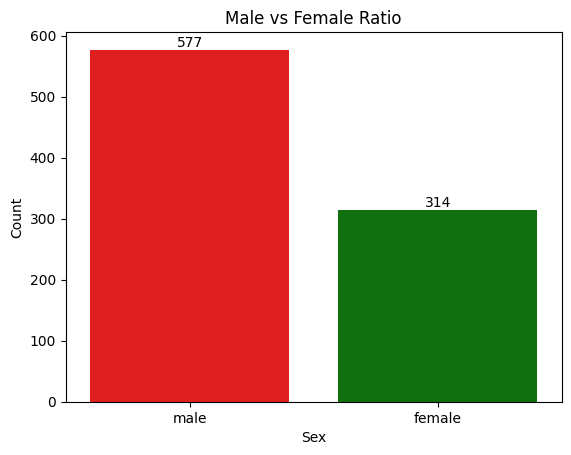

In [17]:
# MALES TRAVELLED MORE THAN FEMALES

data3 = data["Sex"].value_counts().reset_index()
data3.columns = ["Sex", "Count"]
bar3 = sns.barplot(x=data3["Sex"], y=data3["Count"], palette=["r", "g", "y"])
bar3.bar_label(bar3.containers[0])
bar3.bar_label(bar3.containers[1])
plt.title("Male vs Female Ratio")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_9416\1102015506.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar4 = sns.barplot(x=data4["Embarked"], y=data4["Count"], palette=["k", "b", "m"])


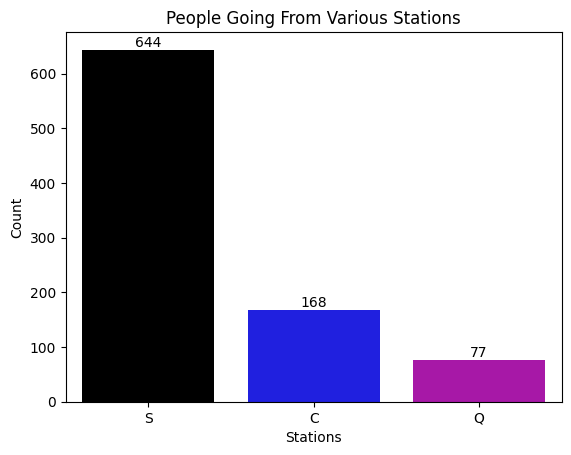

In [25]:
# MAXIMUM NUMBER OF PEOPLE WERE TRAVELLING FROM STATION "S".

data4 = data["Embarked"].value_counts().reset_index()
data4.columns = ["Embarked", "Count"]
bar4 = sns.barplot(x=data4["Embarked"], y=data4["Count"], palette=["k", "b", "m"])
bar4.bar_label(bar4.containers[0])
bar4.bar_label(bar4.containers[1])
bar4.bar_label(bar4.containers[2])
plt.title("People Going From Various Stations")
plt.xlabel("Stations")
plt.ylabel("Count")
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_9416\2441434967.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar5 = sns.barplot(
C:\Users\user\AppData\Local\Temp\ipykernel_9416\2441434967.py:5: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  bar5 = sns.barplot(


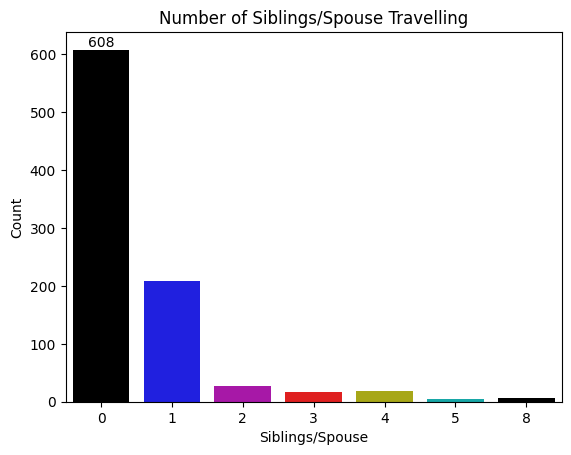

In [45]:
# NUMBER OF SIBLINGS AND SPOUSE WERE TRAVELLING

data5 = data["SibSp"].value_counts().reset_index()
data5.columns = ["SibSp", "Count"]
bar5 = sns.barplot(
    x=data5["SibSp"], y=data5["Count"], palette=["k", "b", "m", "r", "y", "c"]
)
bar5.bar_label(bar5.containers[0])
plt.title("Number of Siblings/Spouse Travelling")
plt.xlabel("Siblings/Spouse")
plt.ylabel("Count")
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_9416\2214358640.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar6 = sns.barplot(
C:\Users\user\AppData\Local\Temp\ipykernel_9416\2214358640.py:5: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  bar6 = sns.barplot(


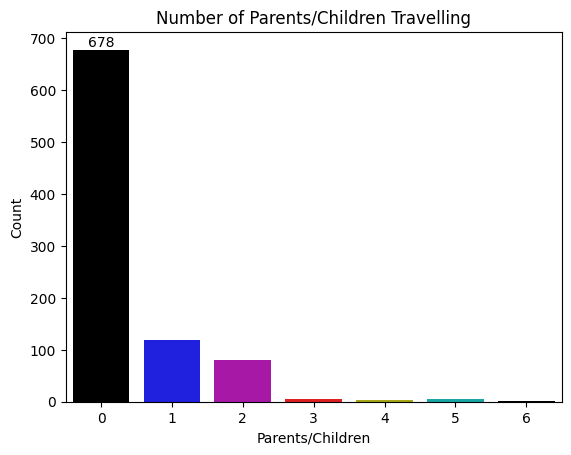

In [44]:
# BOTH SPOUSES/SIBLINGS AND PARENT/CHILDREN GRAPH SHOWS THAT MAXIMUM PEOPLE TRAVELLED ALONE

data6 = data["Parch"].value_counts().reset_index()
data6.columns = ["Parch", "Count"]
bar6 = sns.barplot(
    x=data6["Parch"], y=data6["Count"], palette=["k", "b", "m", "r", "y", "c"]
)
bar6.bar_label(bar6.containers[0])
plt.title("Number of Parents/Children Travelling")
plt.xlabel("Parents/Children")
plt.ylabel("Count")
plt.show()


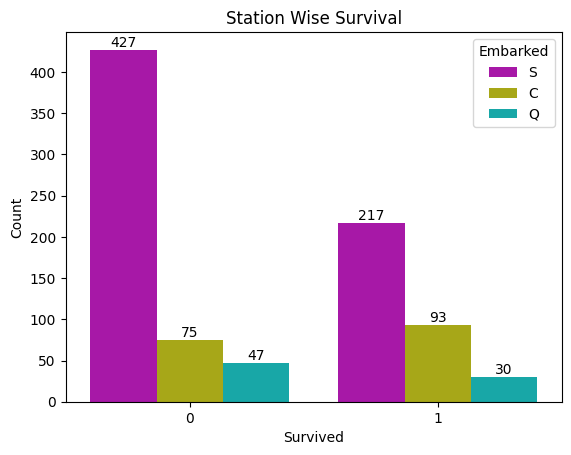

In [46]:
# MAXIMUM PEOPLE WHO DIED WERE FROM STATION "S"

data7 = data[["Survived", "Embarked"]].value_counts().reset_index()
data7.columns = ["Survived", "Embarked", "Count"]
bar7 = sns.barplot(
    x=data7["Survived"],
    y=data7["Count"],
    hue=data7["Embarked"],
    palette=["m", "y", "c"],
)
bar7.bar_label(bar7.containers[0])
bar7.bar_label(bar7.containers[1])
bar7.bar_label(bar7.containers[2])
plt.title("Station Wise Survival")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()


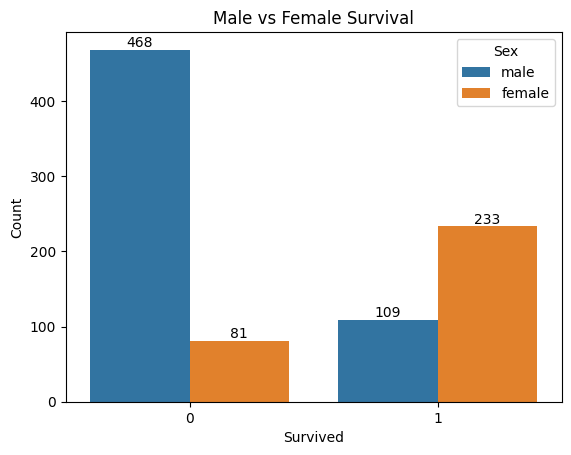

In [47]:
# FEMALES SURVIVED MORE THAN MALES

data8 = data[["Survived", "Sex"]].value_counts().reset_index()
data8.columns = ["Survived", "Sex", "Count"]
bar8 = sns.barplot(x=data8["Survived"], y=data8["Count"], hue=data8["Sex"])
bar8.bar_label(bar8.containers[0])
bar8.bar_label(bar8.containers[1])
plt.title("Male vs Female Survival")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()


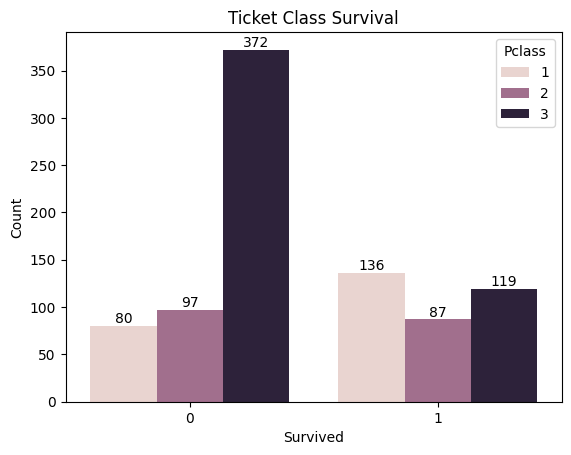

In [48]:
# PEOPLE WHO TRAVELLED IN 3RD CLASS DIED MORE

data9 = data[["Survived", "Pclass"]].value_counts().reset_index()
data9.columns = ["Survived", "Pclass", "Count"]
bar9 = sns.barplot(x=data9["Survived"], y=data9["Count"], hue=data9["Pclass"])
bar9.bar_label(bar9.containers[0])
bar9.bar_label(bar9.containers[1])
bar9.bar_label(bar9.containers[2])
plt.title("Ticket Class Survival")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()


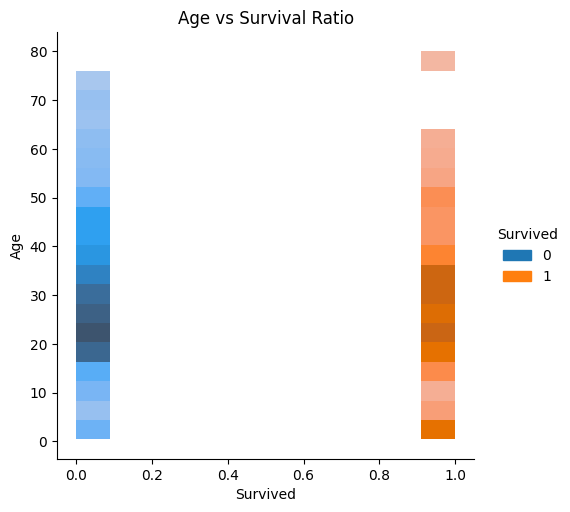

In [49]:
sns.displot(x=data["Survived"], y=data["Age"], hue=data["Survived"])
plt.title("Age vs Survival Ratio")
plt.show()


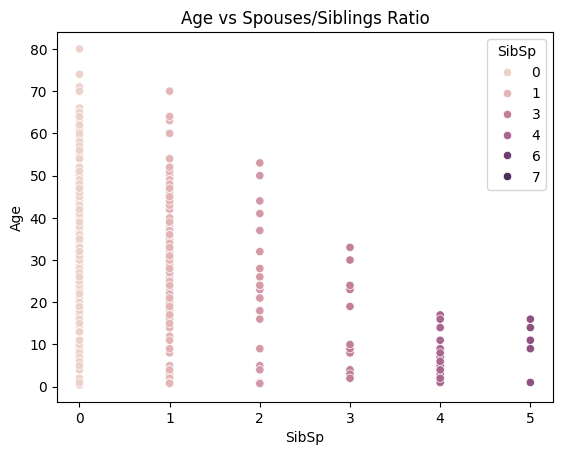

In [50]:
# PEOPLE BETWEEN 0-30 YEARS TRAVELLED WITH >=4 PEOPLE.

sns.scatterplot(x=data["SibSp"], y=data["Age"], hue=data["SibSp"])
plt.title("Age vs Spouses/Siblings Ratio")
plt.show()


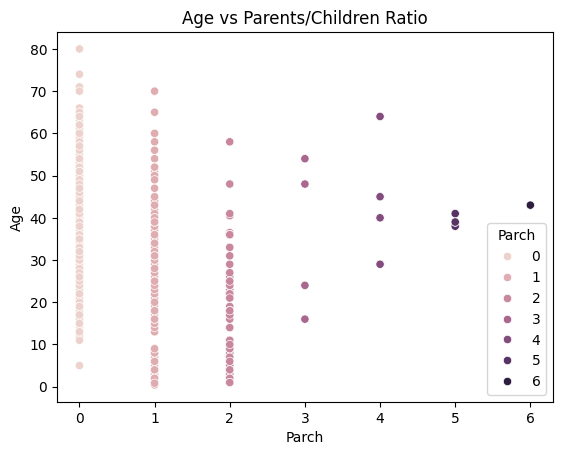

In [51]:
# AS YOU CAN SEE PEOPLE AGED BETWEEN 30-70 YEARS TRAVELLED WITH THEIR CHILDEN.

sns.scatterplot(x=data["Parch"], y=data["Age"], hue=data["Parch"])
plt.title("Age vs Parents/Children Ratio")
plt.show()


# DATA PREPROCESSING

##### ENCODING "Sex" AND "Embarked" COLUMN

In [52]:
data["Sex"] = data["Sex"].map({"male": 1, "female": 0})
data["Embarked"] = data["Embarked"].map({"S": 0, "C": 1, "Q": 2})


In [54]:
# ENCODING "Name", "Ticket" AND "Cabin" COLUMNS¶

data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0.0


In [55]:
le = LabelEncoder()
data["Name"] = le.fit_transform(data["Name"])
data["Ticket"] = le.fit_transform(data["Ticket"])


In [56]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,NaN,0.0
1,2,1,1,190,0,38.0,1,0,596,71.2833,C85,1.0
2,3,1,3,353,0,26.0,0,0,669,7.9250,NaN,0.0
3,4,1,1,272,0,35.0,1,0,49,53.1000,C123,0.0
4,5,0,3,15,1,35.0,0,0,472,8.0500,NaN,0.0


In [57]:
# HANDLING MISSING VALUES

data["Age"].fillna(data["Age"].median(), inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_9416\1196133928.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Age"].fillna(data["Age"].median(), inplace=True)


In [58]:
data["Age"].isnull().sum()


np.int64(0)

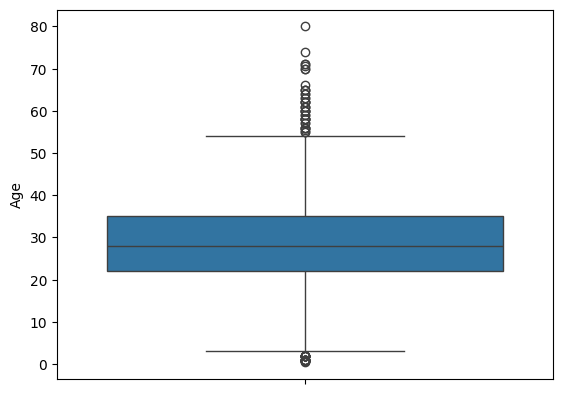

In [59]:
sns.boxplot(y=data["Age"])
plt.show()


In [60]:
data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_9416\3644085981.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)


In [62]:
data["Embarked"].isnull().sum()


np.int64(0)

In [61]:
# CHANGING DATATYPE TO INTEGER

data["Age"] = data["Age"].astype(int)
data["Embarked"] = data["Embarked"].astype(int)
data["Fare"] = data["Fare"].astype(int)


In [63]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    int64 
 4   Sex          891 non-null    int64 
 5   Age          891 non-null    int64 
 6   SibSp        891 non-null    int64 
 7   Parch        891 non-null    int64 
 8   Ticket       891 non-null    int64 
 9   Fare         891 non-null    int64 
 10  Cabin        204 non-null    object
 11  Embarked     891 non-null    int64 
dtypes: int64(11), object(1)
memory usage: 83.7+ KB


# FEATURE ENGINEERING

In [64]:
# DROPPING 'Cabin' AS IT HAS TWO MANY NULL VALUES¶

data.drop("Cabin", axis=1, inplace=True)
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108,1,22,1,0,523,7,0
1,2,1,1,190,0,38,1,0,596,71,1
2,3,1,3,353,0,26,0,0,669,7,0
3,4,1,1,272,0,35,1,0,49,53,0
4,5,0,3,15,1,35,0,0,472,8,0


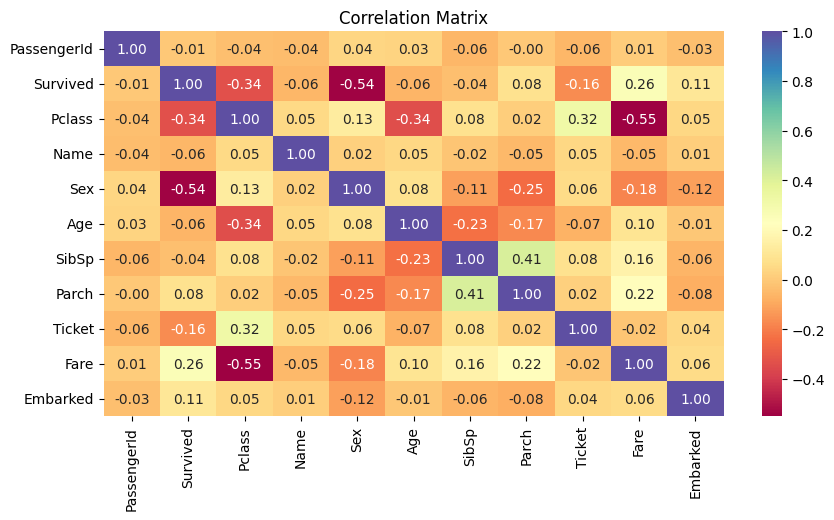

In [65]:
plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(), fmt=".2f", annot=True, cmap="Spectral")
plt.title("Correlation Matrix")
plt.show()


In [66]:
# DROPPING "PassengerId", "Name" AND "Ticket" AS THEY ARE JUST UNIQUE IDENTIFIERS

data.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)


In [67]:
features = data.drop("Survived", axis=1)
target = data["Survived"]


In [68]:
features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22,1,0,7,0
1,1,0,38,1,0,71,1
2,3,0,26,0,0,7,0
3,1,0,35,1,0,53,0
4,3,1,35,0,0,8,0


In [70]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [71]:
# CHI SQUARE TEST

chi_test = chi2(features, target)


C:\Users\user\AppData\Local\Temp\ipykernel_9416\1973623259.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar10 = sns.barplot(
C:\Users\user\AppData\Local\Temp\ipykernel_9416\1973623259.py:9: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  bar10 = sns.barplot(


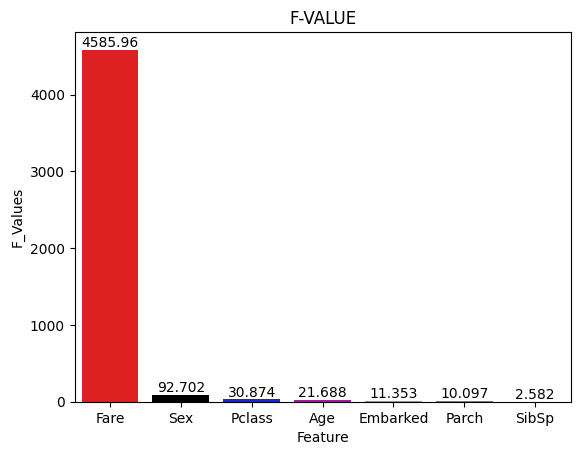

In [80]:
# F-VALUE

value1 = chi_test[0]
f_value = pd.Series(value1)
f_value.index = features.columns
df1 = pd.DataFrame({"Feature": f_value.index, "F_Values": f_value})
df1.sort_values(ascending=False, by="F_Values", inplace=True)
df1["F_Values"] = df1["F_Values"].round(3)
bar10 = sns.barplot(
    x="Feature", y="F_Values", data=df1, palette=["r", "k", "b", "m", "y", "c"]
)
bar10.bar_label(bar10.containers[0])
bar10.bar_label(bar10.containers[1])
bar10.bar_label(bar10.containers[2])
bar10.bar_label(bar10.containers[3])
bar10.bar_label(bar10.containers[4])
bar10.bar_label(bar10.containers[5])
bar10.bar_label(bar10.containers[6])
plt.title("F-VALUE")
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_9416\67287948.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar11 = sns.barplot(
C:\Users\user\AppData\Local\Temp\ipykernel_9416\67287948.py:8: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  bar11 = sns.barplot(


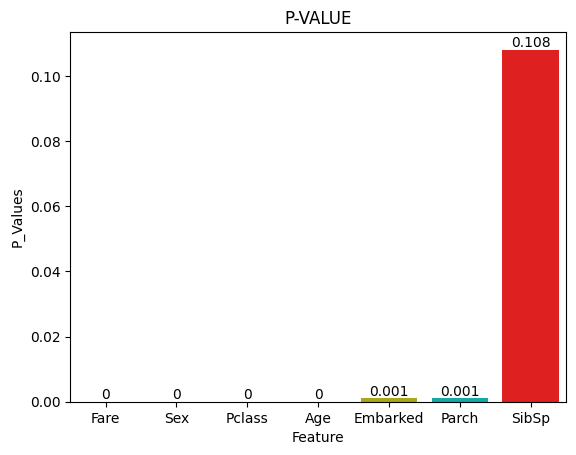

In [81]:
# P-VALUE

value2 = chi_test[1]
p_value = pd.Series(value2)
p_value.index = features.columns
df2 = pd.DataFrame({"Feature": p_value.index, "P_Values": p_value})
df2.sort_values(ascending=True, by="P_Values", inplace=True)
df2["P_Values"] = df2["P_Values"].round(3)
bar11 = sns.barplot(
    x="Feature", y="P_Values", data=df2, palette=["r", "k", "b", "m", "y", "c"]
)
bar11.bar_label(bar11.containers[0])
bar11.bar_label(bar11.containers[1])
bar11.bar_label(bar11.containers[2])
bar11.bar_label(bar11.containers[3])
bar11.bar_label(bar11.containers[4])
bar11.bar_label(bar11.containers[5])
bar11.bar_label(bar11.containers[6])
plt.title("P-VALUE")
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_9416\1362900652.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar12 = sns.barplot(
C:\Users\user\AppData\Local\Temp\ipykernel_9416\1362900652.py:9: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  bar12 = sns.barplot(


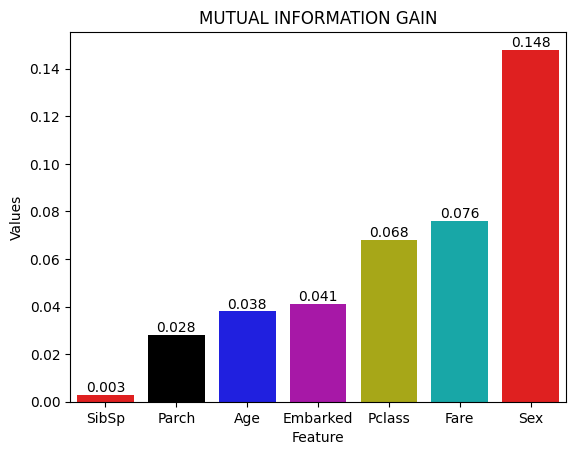

In [84]:
# MUTUAL INFORMATION GAIN

value3 = mutual_info_classif(features, target)
mutual_info = pd.Series(value3)
mutual_info.index = features.columns
df3 = pd.DataFrame({"Feature": mutual_info.index, "Values": mutual_info})
df3.sort_values(ascending=True, by="Values", inplace=True)
df3["Values"] = df3["Values"].round(3)
bar12 = sns.barplot(
    x="Feature", y="Values", data=df3, palette=["r", "k", "b", "m", "y", "c"]
)
bar12.bar_label(bar12.containers[0])
bar12.bar_label(bar12.containers[1])
bar12.bar_label(bar12.containers[2])
bar12.bar_label(bar12.containers[3])
bar12.bar_label(bar12.containers[4])
bar12.bar_label(bar12.containers[5])
bar12.bar_label(bar12.containers[6])
plt.title("MUTUAL INFORMATION GAIN")
plt.show()


In [85]:
# 'CHI SQUARE TEST' AND 'MUTUAL INFORMATION' CLEARLY DEPICT THE MOST IMPORTANT COLUMNS i.e. 'Sex','Fare','Pclass','Age','Embarked'.

features.drop(["SibSp", "Parch"], axis=1, inplace=True)


In [86]:
features.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,1,22,7,0
1,1,0,38,71,1
2,3,0,26,7,0
3,1,0,35,53,0
4,3,1,35,8,0


# SPLITTING THE DATA INTO TRAINING AND TESTING DATA

In [87]:
x_train, x_test, y_train, y_test = train_test_split(
    features, target, test_size=0.3, random_state=24
)


In [88]:
x_train.shape

(623, 5)

In [89]:
x_test.shape


(268, 5)

# MODEL TRAINING
### RANDOM FOREST CLASSIFIER

In [103]:
parameters = {
    "criterion": ["gini", "entropy"],
    "max_depth": [2, 6, 10, 14, 18],
    "min_samples_split": [3, 7, 11, 15, 19],
    "max_features": ["sqrt", "log2"],
    "n_estimators": [100, 200, 300, 400],
}
model2 = RandomForestClassifier()
tuning = GridSearchCV(model2, param_grid=parameters, cv=5, scoring="accuracy")
tuning.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 6, 10, 14, 18],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [3, 7, 11, 15, 19],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy')

In [118]:
tuning.best_params_


{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_split': 3,
 'n_estimators': 100}

In [119]:
train_pred2 = tuning.predict(x_train)
test_pred2 = tuning.predict(x_test)


# PERFORMANCE EVALUATION
##### ACCURACY

In [120]:
train_accuracy2 = accuracy_score(train_pred2, y_train)
print("Training Accuracy- ", train_accuracy2, 2)


Training Accuracy-  0.9309791332263242 2


In [121]:
test_accuracy2 = accuracy_score(test_pred2, y_test)
print("Test Accuracy- ", test_accuracy2, 2)


Test Accuracy-  0.8470149253731343 2


##### CLASSIFICATION REPORT

In [122]:
report = classification_report(test_pred2, y_test)
print(report)


              precision    recall  f1-score   support

           0       0.91      0.86      0.89       184
           1       0.73      0.82      0.77        84

    accuracy                           0.85       268
   macro avg       0.82      0.84      0.83       268
weighted avg       0.85      0.85      0.85       268



##### CONFIDENCE MATRIX

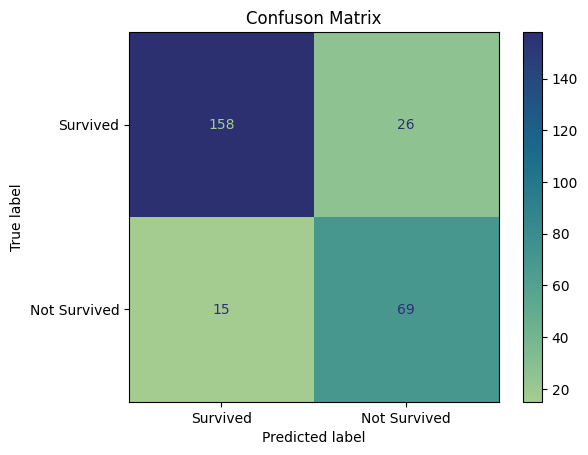

In [123]:
matrix2 = confusion_matrix(test_pred2, y_test)
cm2 = ConfusionMatrixDisplay(matrix2, display_labels=["Survived", "Not Survived"])
cm2.plot(cmap="crest")
plt.title("Confuson Matrix")
plt.show()


# TESTING PREDICTIONS

In [124]:
import warnings

warnings.filterwarnings("ignore", message="X does not have valid feature names")
pclass = 3
sex = 0
age = 78
fare = 7
embarked = 0
new_data = [[pclass, sex, age, fare, embarked]]
pred = tuning.predict(new_data)
if pred[0] == 0:
    print("Not Survived")
else:
    print("Survived")
    

Survived


In [126]:
# Saving Model
import joblib

joblib.dump(le, "Titanic/le.sav")
joblib.dump(model2, "Titanic/model2.sav")
joblib.dump(tuning, "Titanic/tuning.sav")


['Titanic/tuning.sav']